In [1]:
import os
import cv2 as cv
import numpy as np
import pandas as pd
import random
import pickle
import matplotlib.pyplot as plt

import os
from tqdm import tqdm, notebook
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     print(dirname)
#     for filename in filenames:
#         if filename.endswith('.jpg'):
#             continue
#         print(os.path.join(dirname, filename))

In [3]:
train_val_dir = 'train_val/'
train_val_keys = pd.read_csv(os.path.join(train_val_dir, 'keys.csv'))

In [4]:
train_val_keys.head()

,id,category
0,pic000000,red
1,pic000001,green
2,pic000002,red
3,pic000003,red
4,pic000004,red


In [7]:
print(train_val_keys.groupby(['category'])['id'].count())

category
disabled       4588
green         16060
red           20650
red_yellow     2041
yellow         2294
Name: id, dtype: int64


Traffic lights examples

In [14]:
load_img(train_val_dir, tl_states[0])

error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


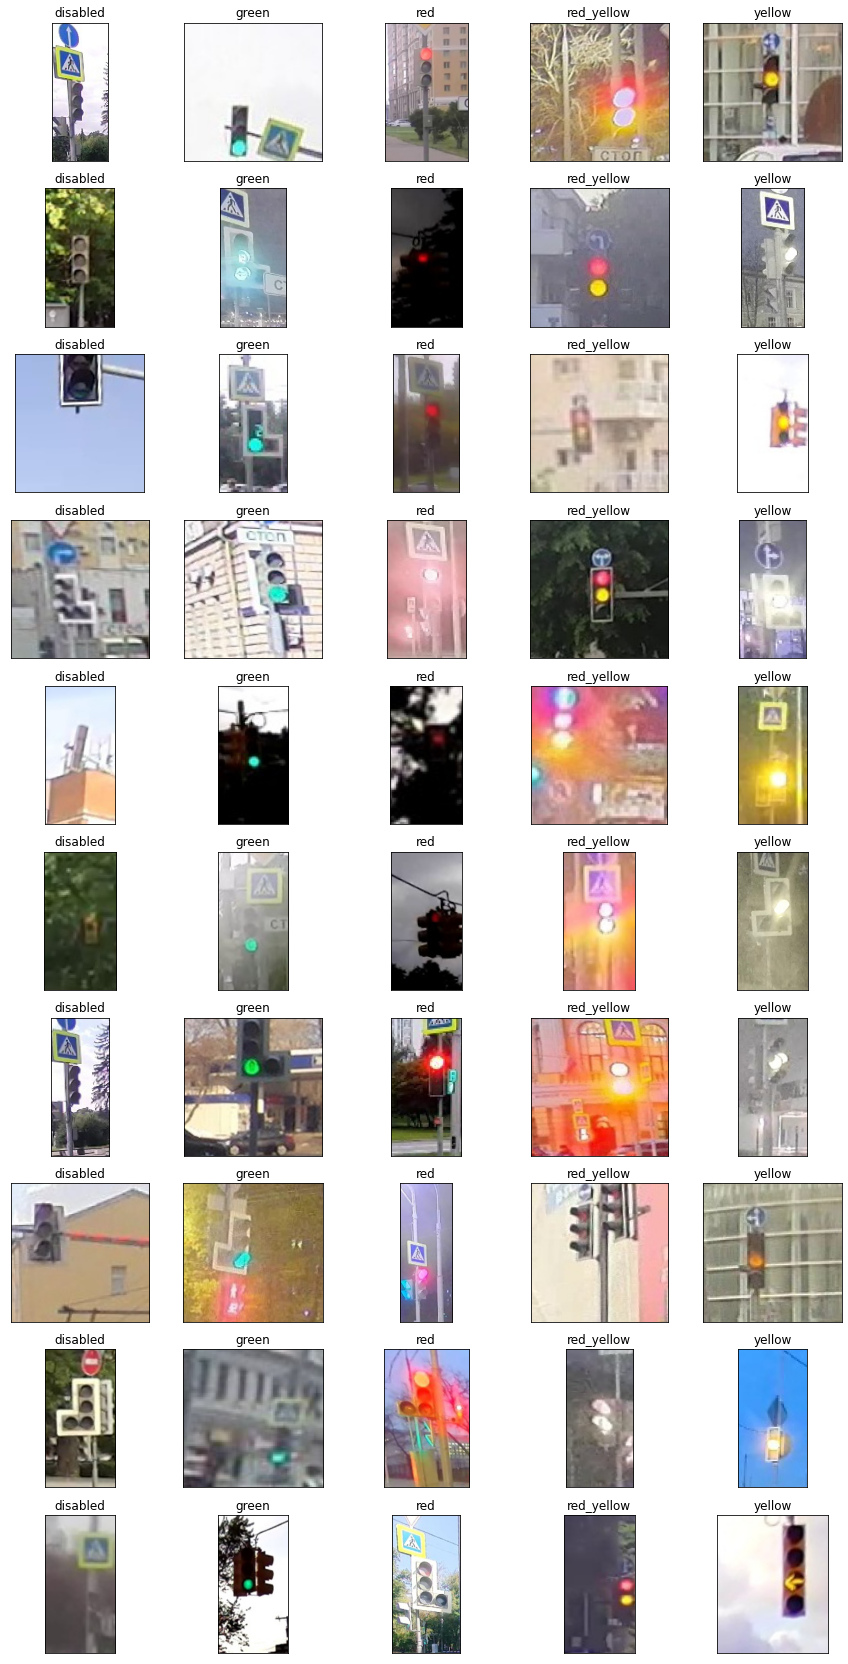

In [8]:
def load_img(subset_dir, pic_id):
    img = cv.imread(os.path.join(subset_dir, 'pic', pic_id + '.jpg'))
    return cv.cvtColor(img, cv.COLOR_BGR2RGB)  # BGR -> RGB convertion

tl_states = np.unique(train_val_keys['category'])
samples_to_show = 10
fig, axs = plt.subplots(samples_to_show, len(tl_states), figsize=(len(tl_states) * 3,samples_to_show * 3),
                        subplot_kw={'xticks': [], 'yticks': []})
for state_idx, state in enumerate(tl_states):
    state_keys = train_val_keys['id'][train_val_keys['category'] == state].values
    for sample_idx in range(samples_to_show):
        axs[sample_idx, state_idx].imshow(load_img(train_val_dir, state_keys[sample_idx]))
        axs[sample_idx, state_idx].set_title(state)
plt.show()

Images resolution estimation

In [9]:
images_shapes = np.array([load_img(train_val_dir, pic_id).shape for pic_id in notebook.tqdm(train_val_keys['id'])])

  0%|          | 0/45633 [00:00<?, ?it/s]

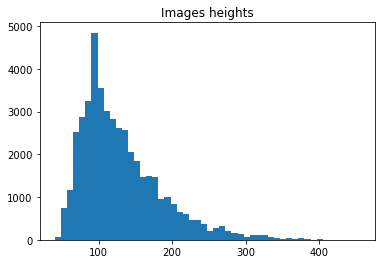

117.0


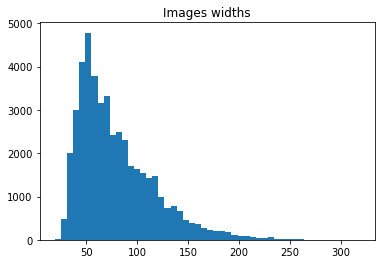

69.0


<ipython-input-10-fc64e1c552a9>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  images_aspect_ratio = images_shapes[:, 1].astype(np.float) / images_shapes[:, 0]


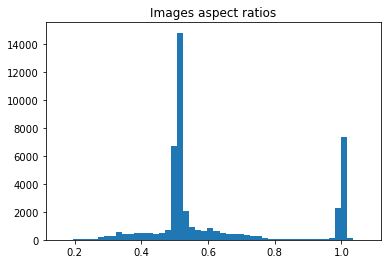

In [10]:
plt.hist(images_shapes[:, 0], bins=50)
plt.title('Images heights')
plt.show()
print(np.median(images_shapes[:, 0]))
plt.hist(images_shapes[:, 1], bins=50)
plt.title('Images widths')
plt.show()
print(np.median(images_shapes[:, 1]))
images_aspect_ratio = images_shapes[:, 1].astype(np.float) / images_shapes[:, 0]
plt.title('Images aspect ratios')
plt.hist(images_aspect_ratio, bins=50)
plt.show()

Resize images to a fixed resolution [64x64] adding zeros if necessary

In [ ]:
FIXED_IMG_HEIGHT = 64
FIXED_IMG_WIDTH = 64

def resize_img(img, res_shape=(FIXED_IMG_HEIGHT, FIXED_IMG_WIDTH)):
    height, width = img.shape[:2]
    resized_width = int(res_shape[0] * (float(width) / height))
    img_resized = cv.resize(img, (resized_width, int(res_shape[0])))
    width_to_copy = min(resized_width, res_shape[1])
    img_resized_filled_with_zero = np.zeros([res_shape[0], res_shape[1], 3], dtype=img.dtype)
    img_resized_filled_with_zero[:, :width_to_copy, :] = img_resized[:, :width_to_copy, :]
    return img_resized_filled_with_zero

for pic_id in train_val_keys['id'][:10]:
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3), subplot_kw={'xticks': [], 'yticks': []})
    img = load_img(train_val_dir, pic_id)
    ax1.imshow(img)
    ax2.imshow(resize_img(img))
    plt.show()

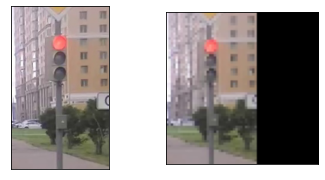

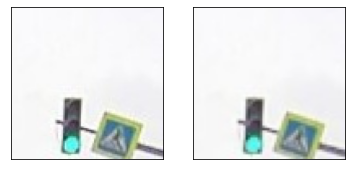

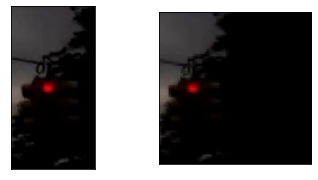

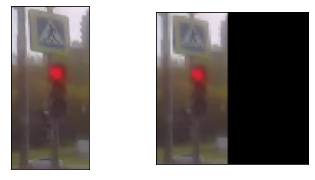

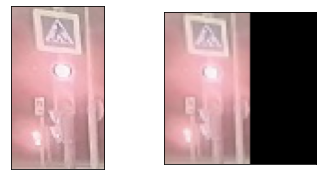

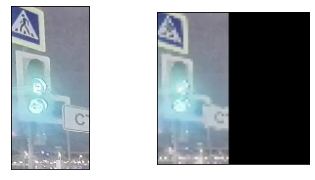

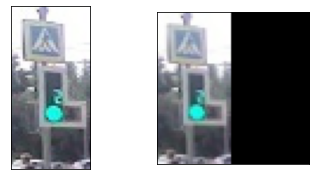

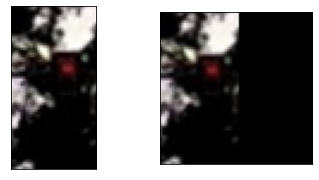

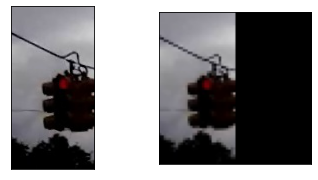

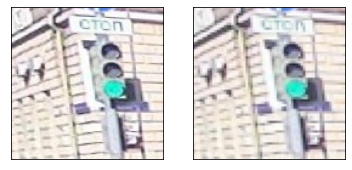